## Project One - Titanic Survival Prediction


In [1]:
import warnings
warnings.simplefilter("ignore")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report


tdf = pd.read_csv("titanic_train.csv")

X,Y = tdf.loc[:, tdf.columns != 'Survived'], tdf['Survived']

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)


df = pd.concat([X_train,y_train], axis=1)
df_test = X_test

df_test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
458,459,2,"Toomey, Miss. Ellen",female,50.0,0,0,F.C.C. 13531,10.5000,NaN,S
863,864,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
117,118,2,"Turpin, Mr. William John Robert",male,29.0,1,0,11668,21.0000,NaN,S
711,712,1,"Klaber, Mr. Herman",male,NaN,0,0,113028,26.5500,C124,S
359,360,3,"Mockler, Miss. Helen Mary ""Ellie""",female,NaN,0,0,330980,7.8792,NaN,Q


In [3]:
df.shape

(623, 12)

dataset has 891 rows ans 12 columns

In [4]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,623.000000,623.000000,507.000000,623.000000,623.000000,623.000000,623.000000
mean,445.728732,2.271268,30.550611,0.460674,0.349920,31.510887,0.372392
std,258.111971,0.844079,14.639623,0.947824,0.791553,49.888251,0.483830
min,2.000000,1.000000,0.750000,0.000000,0.000000,0.000000,0.000000
25%,220.500000,1.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,443.000000,3.000000,29.000000,0.000000,0.000000,14.500000,0.000000
75%,672.500000,3.000000,39.000000,1.000000,0.000000,30.597900,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 289 to 583
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  623 non-null    int64  
 1   Pclass       623 non-null    int64  
 2   Name         623 non-null    object 
 3   Sex          623 non-null    object 
 4   Age          507 non-null    float64
 5   SibSp        623 non-null    int64  
 6   Parch        623 non-null    int64  
 7   Ticket       623 non-null    object 
 8   Fare         623 non-null    float64
 9   Cabin        149 non-null    object 
 10  Embarked     622 non-null    object 
 11  Survived     623 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 63.3+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            116
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          474
Embarked         1
Survived         0
dtype: int64

In [7]:
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,623,623,623,149,622
unique,623,2,521,121,3
top,"Chaffee, Mr. Herbert Fuller",male,347082,D,S
freq,1,406,6,3,443


In [8]:
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            116
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          474
Embarked         1
Survived         0
dtype: int64

In [9]:
survived = df[df['Survived']==1]
not_survived = df[df['Survived']==0]
print("Survived = %i(%.1f%%)" %(len(not_survived), float(len(survived))/len(df)*100))
print("Not Survived = %i(%.1f%%)" %(len(not_survived), float(len(not_survived))/len(df)*100))
print("Total: %i"%len(df))

Survived = 391(37.2%)
Not Survived = 391(62.8%)
Total: 623


In [10]:
df.Pclass.value_counts()

3    329
1    160
2    134
Name: Pclass, dtype: int64

In [11]:
df.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1            96
        0            64
2       0            75
        1            59
3       0           252
        1            77
Name: Survived, dtype: int64

In [12]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean()

,Pclass,Survived
0,1,0.600000
1,2,0.440299
2,3,0.234043


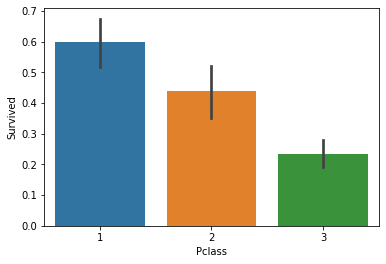

In [13]:
sns.barplot(x='Pclass', y='Survived', data=df)

Pclass 1 have better survival chance

In [14]:
df.Sex.value_counts()

male      406
female    217
Name: Sex, dtype: int64

There are More males onboard

In [15]:
df.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           157
        0            60
male    0           331
        1            75
Name: Survived, dtype: int64

In [16]:
df[['SibSp', 'Survived']].groupby(['SibSp'], as_index = False).mean()

,SibSp,Survived
0,0,0.339492
1,1,0.506757
2,2,0.500000
3,3,0.250000
4,4,0.000000
5,5,0.000000
6,8,0.000000


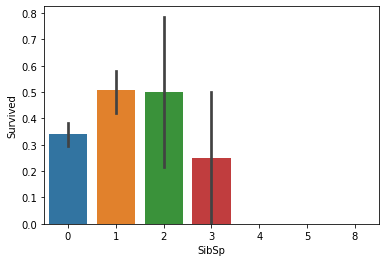

In [17]:
sns.barplot(x='SibSp', y='Survived', data=df)

Sex     female  male
Pclass              
1           64    96
2           56    78
3           97   232


Text(0, 0.5, 'Percentage')

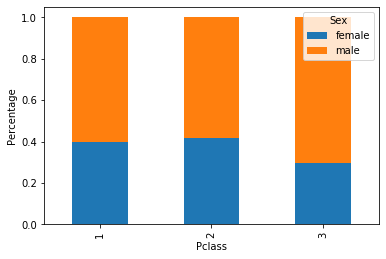

In [18]:
tab = pd.crosstab(df['Pclass'], df['Sex'])
print(tab)

tab.div(tab.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Pclass')
plt.ylabel('Percentage')

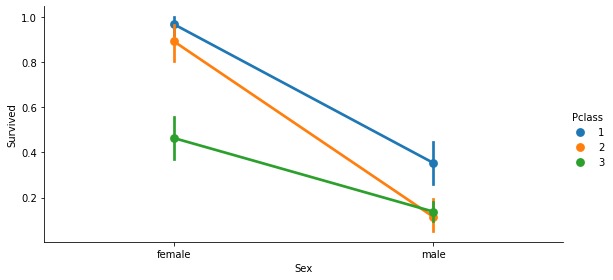

In [19]:
sns.factorplot('Sex','Survived', hue='Pclass', size=4, aspect=2, data=df)

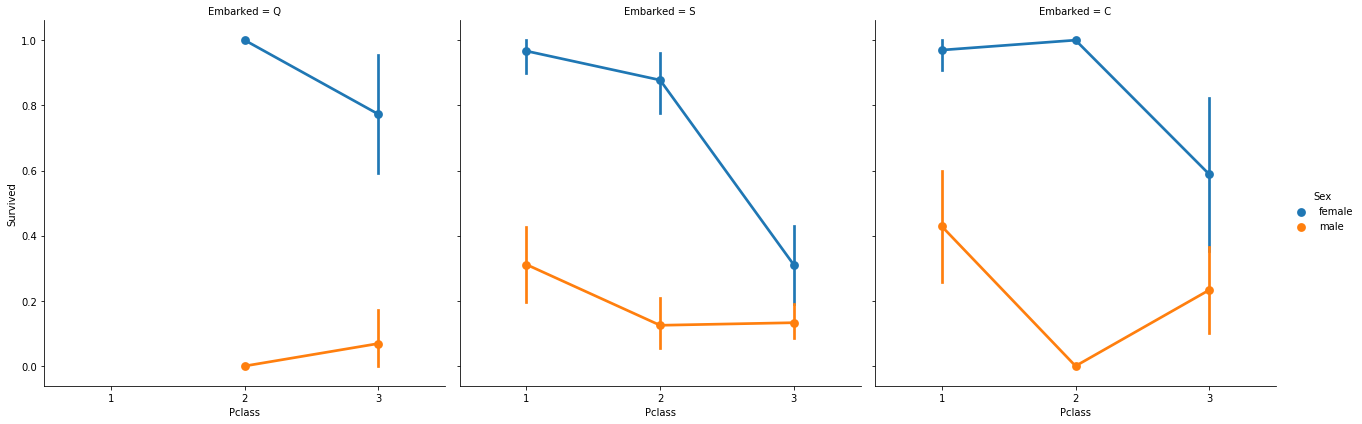

In [20]:
sns.factorplot('Pclass','Survived', hue='Sex',col='Embarked', size=6, aspect=1, data=df)

In [21]:
df.Parch.value_counts()

0    484
1     84
2     45
5      4
4      3
3      2
6      1
Name: Parch, dtype: int64

In [22]:
df.groupby('Parch').Survived.value_counts()

Parch  Survived
0      0           322
       1           162
1      1            45
       0            39
2      1            23
       0            22
3      0             1
       1             1
4      0             3
5      0             3
       1             1
6      0             1
Name: Survived, dtype: int64

In [23]:
df[['Parch', 'Survived']].groupby(['Parch'], as_index = False).mean()

,Parch,Survived
0,0,0.334711
1,1,0.535714
2,2,0.511111
3,3,0.500000
4,4,0.000000
5,5,0.250000
6,6,0.000000


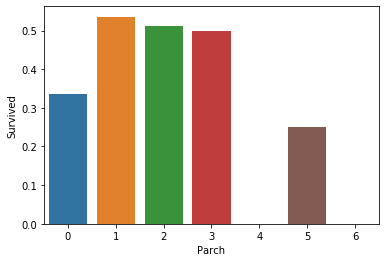

In [24]:
sns.barplot(x='Parch', y='Survived', data=df, ci = None)

In [25]:
df.Age.value_counts()

24.0    19
28.0    19
30.0    18
19.0    18
22.0    17
        ..
36.5     1
14.5     1
24.5     1
12.0     1
70.5     1
Name: Age, Length: 82, dtype: int64

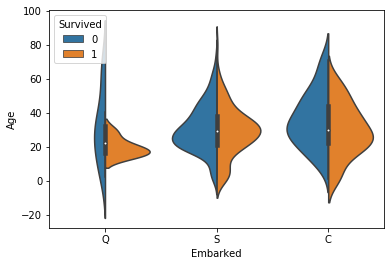

In [26]:
sns.violinplot(x='Embarked', y='Age', hue='Survived', data=df, split=True)

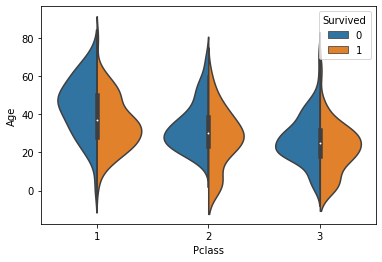

In [27]:
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df, split=True)

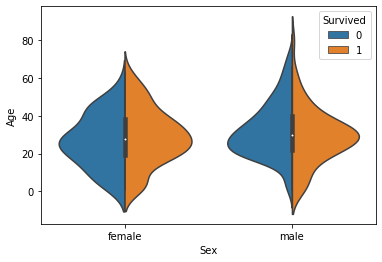

In [28]:
sns.violinplot(x='Sex', y='Age', hue='Survived', data=df, split=True)

In [29]:
total_survived = df[df['Survived']==1]
total_not_survived = df[df['Survived']==0]

In [30]:
Male_survived = df[(df['Survived']==1) & (df['Sex']=='male')]
Female_survived = df[(df['Survived']==1) & (df['Sex']=='female')]

In [31]:
Male_not_survived = df[(df['Survived']==0) & (df['Sex']=='male')]
Female_not_survived = df[(df['Survived']==0) & (df['Sex']=='female')]

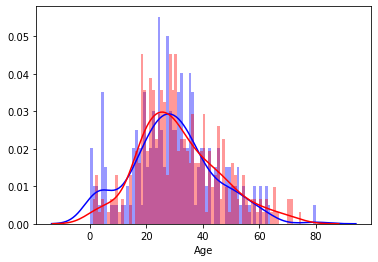

In [32]:
sns.distplot(total_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=True, color='blue')
sns.distplot(total_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=True, color='red' , axlabel='Age')


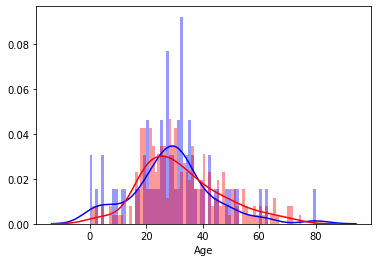

In [33]:
sns.distplot(Male_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=True, color='blue')
sns.distplot(Male_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=True, color='red' , axlabel='Age')


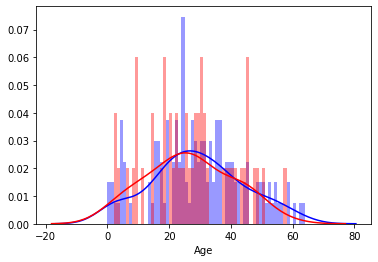

In [34]:
sns.distplot(Female_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=True, color='blue')
sns.distplot(Female_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=True, color='red' , axlabel='Age')


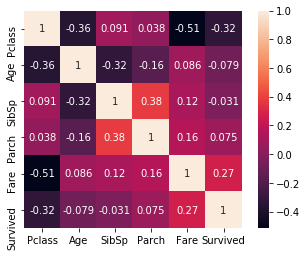

In [35]:
sns.heatmap(df.drop('PassengerId',axis=1).corr(), square=True, annot=True)

In [36]:
train_testdf = [df, df_test]
for dataset in train_testdf:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.')

In [37]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title
289,290,3,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.750,NaN,Q,1,Miss
861,862,2,"Giles, Mr. Frederick Edward",male,21.0,1,0,28134,11.500,NaN,S,0,Mr
402,403,3,"Jussila, Miss. Mari Aina",female,21.0,1,0,4137,9.825,NaN,S,0,Miss
363,364,3,"Asim, Mr. Adola",male,35.0,0,0,SOTON/O.Q. 3101310,7.050,NaN,S,0,Mr
728,729,2,"Bryhl, Mr. Kurt Arnold Gottfrid",male,25.0,1,0,236853,26.000,NaN,S,0,Mr


In [38]:
pd.crosstab(df['Title'], df['Sex'])

Sex,female,male
Title,,
Col,0,1
Countess,1,0
Don,0,1
Dr,1,3
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,22
Miss,118,0


In [39]:
for dataset in train_testdf:
    dataset['Title'] = dataset['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'], 'Other')
    dataset['Title'] = dataset['Title'].replace('Mlle','Miss')
    dataset['Title'] = dataset['Title'].replace('Ms','Miss')
    dataset['Title'] = dataset['Title'].replace('Mme','Mrs')
df[['Title','Survived']].groupby(['Title'], as_index=False).mean()   

,Title,Survived
0,Master,0.500000
1,Miss,0.677686
2,Mr,0.164865
3,Mrs,0.774194
4,Other,0.352941


In [40]:
title_map = {'Mr':1, 'Miss':2, 'Master':3, 'Mrs':4, 'Other':5}
for dataset in train_testdf:
    dataset['Title'] = dataset['Title'].map(title_map)
    dataset['Title'] = dataset['Title'].fillna(0)

In [41]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title
289,290,3,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.750,NaN,Q,1,2
861,862,2,"Giles, Mr. Frederick Edward",male,21.0,1,0,28134,11.500,NaN,S,0,1
402,403,3,"Jussila, Miss. Mari Aina",female,21.0,1,0,4137,9.825,NaN,S,0,2
363,364,3,"Asim, Mr. Adola",male,35.0,0,0,SOTON/O.Q. 3101310,7.050,NaN,S,0,1
728,729,2,"Bryhl, Mr. Kurt Arnold Gottfrid",male,25.0,1,0,236853,26.000,NaN,S,0,1


In [42]:
for dataset in train_testdf:
    dataset['Sex'] = dataset['Sex'].map({'female':1,'male':0}).astype(int)

In [43]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title
289,290,3,"Connolly, Miss. Kate",1,22.0,0,0,370373,7.750,NaN,Q,1,2
861,862,2,"Giles, Mr. Frederick Edward",0,21.0,1,0,28134,11.500,NaN,S,0,1
402,403,3,"Jussila, Miss. Mari Aina",1,21.0,1,0,4137,9.825,NaN,S,0,2
363,364,3,"Asim, Mr. Adola",0,35.0,0,0,SOTON/O.Q. 3101310,7.050,NaN,S,0,1
728,729,2,"Bryhl, Mr. Kurt Arnold Gottfrid",0,25.0,1,0,236853,26.000,NaN,S,0,1


In [44]:
df.Embarked.unique()

array(['Q', 'S', 'C', nan], dtype=object)

In [45]:
df.Embarked.value_counts()

S    443
C    126
Q     53
Name: Embarked, dtype: int64

In [46]:
for dataset in train_testdf:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [47]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title
289,290,3,"Connolly, Miss. Kate",1,22.0,0,0,370373,7.750,NaN,Q,1,2
861,862,2,"Giles, Mr. Frederick Edward",0,21.0,1,0,28134,11.500,NaN,S,0,1
402,403,3,"Jussila, Miss. Mari Aina",1,21.0,1,0,4137,9.825,NaN,S,0,2
363,364,3,"Asim, Mr. Adola",0,35.0,0,0,SOTON/O.Q. 3101310,7.050,NaN,S,0,1
728,729,2,"Bryhl, Mr. Kurt Arnold Gottfrid",0,25.0,1,0,236853,26.000,NaN,S,0,1


In [48]:
for dataset in train_testdf:
    dataset['Embarked'] = dataset['Embarked'].map({'S':0 , 'C':1 , 'Q':2 }).astype(int)

In [49]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title
289,290,3,"Connolly, Miss. Kate",1,22.0,0,0,370373,7.750,NaN,2,1,2
861,862,2,"Giles, Mr. Frederick Edward",0,21.0,1,0,28134,11.500,NaN,0,0,1
402,403,3,"Jussila, Miss. Mari Aina",1,21.0,1,0,4137,9.825,NaN,0,0,2
363,364,3,"Asim, Mr. Adola",0,35.0,0,0,SOTON/O.Q. 3101310,7.050,NaN,0,0,1
728,729,2,"Bryhl, Mr. Kurt Arnold Gottfrid",0,25.0,1,0,236853,26.000,NaN,0,0,1


In [50]:
for dataset in train_testdf:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg - age_std , age_avg + age_std, size = age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    
    dataset['Age'] = dataset['Age'].astype(int)

df['AgeRange'] = pd.cut(df['Age'], 5)
print(df[['AgeRange','Survived']].groupby(['AgeRange'], as_index = False).mean())

        AgeRange  Survived
0  (-0.08, 16.0]  0.507042
1   (16.0, 32.0]  0.358553
2   (32.0, 48.0]  0.344086
3   (48.0, 64.0]  0.423077
4   (64.0, 80.0]  0.100000


In [51]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title,AgeRange
289,290,3,"Connolly, Miss. Kate",1,22,0,0,370373,7.750,NaN,2,1,2,"(16.0, 32.0]"
861,862,2,"Giles, Mr. Frederick Edward",0,21,1,0,28134,11.500,NaN,0,0,1,"(16.0, 32.0]"
402,403,3,"Jussila, Miss. Mari Aina",1,21,1,0,4137,9.825,NaN,0,0,2,"(16.0, 32.0]"
363,364,3,"Asim, Mr. Adola",0,35,0,0,SOTON/O.Q. 3101310,7.050,NaN,0,0,1,"(32.0, 48.0]"
728,729,2,"Bryhl, Mr. Kurt Arnold Gottfrid",0,25,1,0,236853,26.000,NaN,0,0,1,"(16.0, 32.0]"


In [52]:
for dataset in train_testdf:
    dataset.loc[ dataset['Age']<=16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[dataset['Age'] > 64, 'Age'] = 4

In [53]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title,AgeRange
289,290,3,"Connolly, Miss. Kate",1,1,0,0,370373,7.750,NaN,2,1,2,"(16.0, 32.0]"
861,862,2,"Giles, Mr. Frederick Edward",0,1,1,0,28134,11.500,NaN,0,0,1,"(16.0, 32.0]"
402,403,3,"Jussila, Miss. Mari Aina",1,1,1,0,4137,9.825,NaN,0,0,2,"(16.0, 32.0]"
363,364,3,"Asim, Mr. Adola",0,2,0,0,SOTON/O.Q. 3101310,7.050,NaN,0,0,1,"(32.0, 48.0]"
728,729,2,"Bryhl, Mr. Kurt Arnold Gottfrid",0,1,1,0,236853,26.000,NaN,0,0,1,"(16.0, 32.0]"


In [54]:
for dataset in train_testdf:
    dataset['Fare'] = dataset['Fare'].fillna(df['Fare'].median())

In [55]:
df['FareRange'] = pd.qcut(df['Fare'],4)
print(df[['FareRange','Survived']].groupby(['FareRange'], as_index = False).mean())

           FareRange  Survived
0    (-0.001, 7.896]  0.189873
1      (7.896, 14.5]  0.284810
2     (14.5, 30.598]  0.443709
3  (30.598, 512.329]  0.576923


In [56]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title,AgeRange,FareRange
289,290,3,"Connolly, Miss. Kate",1,1,0,0,370373,7.750,NaN,2,1,2,"(16.0, 32.0]","(-0.001, 7.896]"
861,862,2,"Giles, Mr. Frederick Edward",0,1,1,0,28134,11.500,NaN,0,0,1,"(16.0, 32.0]","(7.896, 14.5]"
402,403,3,"Jussila, Miss. Mari Aina",1,1,1,0,4137,9.825,NaN,0,0,2,"(16.0, 32.0]","(7.896, 14.5]"
363,364,3,"Asim, Mr. Adola",0,2,0,0,SOTON/O.Q. 3101310,7.050,NaN,0,0,1,"(32.0, 48.0]","(-0.001, 7.896]"
728,729,2,"Bryhl, Mr. Kurt Arnold Gottfrid",0,1,1,0,236853,26.000,NaN,0,0,1,"(16.0, 32.0]","(14.5, 30.598]"


In [57]:
for dataset in train_testdf:
    dataset.loc[dataset['Fare']<= 7.925, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.925) & (dataset['Fare']<=14.5), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.5) & (dataset['Fare']<=31.275), 'Fare'] = 2
    dataset.loc[dataset['Fare'] > 31.275, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

In [58]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title,AgeRange,FareRange
289,290,3,"Connolly, Miss. Kate",1,1,0,0,370373,0,NaN,2,1,2,"(16.0, 32.0]","(-0.001, 7.896]"
861,862,2,"Giles, Mr. Frederick Edward",0,1,1,0,28134,1,NaN,0,0,1,"(16.0, 32.0]","(7.896, 14.5]"
402,403,3,"Jussila, Miss. Mari Aina",1,1,1,0,4137,1,NaN,0,0,2,"(16.0, 32.0]","(7.896, 14.5]"
363,364,3,"Asim, Mr. Adola",0,2,0,0,SOTON/O.Q. 3101310,0,NaN,0,0,1,"(32.0, 48.0]","(-0.001, 7.896]"
728,729,2,"Bryhl, Mr. Kurt Arnold Gottfrid",0,1,1,0,236853,2,NaN,0,0,1,"(16.0, 32.0]","(14.5, 30.598]"


In [59]:
for dataset in train_testdf:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
print(df[['FamilySize','Survived']].groupby(['FamilySize'], as_index= False).mean())

   FamilySize  Survived
0           1  0.296104
1           2  0.529915
2           3  0.600000
3           4  0.736842
4           5  0.111111
5           6  0.066667
6           7  0.142857
7           8  0.000000
8          11  0.000000


In [60]:
for dataset in train_testdf:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] ==1 , 'IsAlone'] =1
print(df[['IsAlone','Survived']].groupby(['IsAlone'], as_index = False).mean())

   IsAlone  Survived
0        0  0.495798
1        1  0.296104


In [61]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone
458,459,2,"Toomey, Miss. Ellen",1,3,0,0,F.C.C. 13531,1,NaN,0,2,1,1
863,864,3,"Sage, Miss. Dorothy Edith ""Dolly""",1,2,8,2,CA. 2343,3,NaN,0,2,11,0
117,118,2,"Turpin, Mr. William John Robert",0,1,1,0,11668,2,NaN,0,1,2,0
711,712,1,"Klaber, Mr. Herman",0,1,0,0,113028,2,C124,0,1,1,1
359,360,3,"Mockler, Miss. Helen Mary ""Ellie""",1,1,0,0,330980,0,NaN,2,2,1,1


In [62]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title,AgeRange,FareRange,FamilySize,IsAlone
289,290,3,"Connolly, Miss. Kate",1,1,0,0,370373,0,NaN,2,1,2,"(16.0, 32.0]","(-0.001, 7.896]",1,1
861,862,2,"Giles, Mr. Frederick Edward",0,1,1,0,28134,1,NaN,0,0,1,"(16.0, 32.0]","(7.896, 14.5]",2,0
402,403,3,"Jussila, Miss. Mari Aina",1,1,1,0,4137,1,NaN,0,0,2,"(16.0, 32.0]","(7.896, 14.5]",2,0
363,364,3,"Asim, Mr. Adola",0,2,0,0,SOTON/O.Q. 3101310,0,NaN,0,0,1,"(32.0, 48.0]","(-0.001, 7.896]",1,1
728,729,2,"Bryhl, Mr. Kurt Arnold Gottfrid",0,1,1,0,236853,2,NaN,0,0,1,"(16.0, 32.0]","(14.5, 30.598]",2,0


In [63]:
X_train.shape, y_train.shape, X_test.shape

((623, 11), (623,), (268, 14))

In [64]:
X_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
289,290,3,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.7500,NaN,Q
861,862,2,"Giles, Mr. Frederick Edward",male,21.0,1,0,28134,11.5000,NaN,S
402,403,3,"Jussila, Miss. Mari Aina",female,21.0,1,0,4137,9.8250,NaN,S
363,364,3,"Asim, Mr. Adola",male,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
728,729,2,"Bryhl, Mr. Kurt Arnold Gottfrid",male,25.0,1,0,236853,26.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
248,249,1,"Beckwith, Mr. Richard Leonard",male,37.0,1,1,11751,52.5542,D35,S
795,796,2,"Otter, Mr. Richard",male,39.0,0,0,28213,13.0000,NaN,S
118,119,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
442,443,3,"Petterson, Mr. Johan Emil",male,25.0,1,0,347076,7.7750,NaN,S


In [65]:
y_train

289    1
861    0
402    0
363    0
728    0
      ..
248    1
795    0
118    0
442    0
583    0
Name: Survived, Length: 623, dtype: int64

In [66]:
X_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone
458,459,2,"Toomey, Miss. Ellen",1,3,0,0,F.C.C. 13531,1,NaN,0,2,1,1
863,864,3,"Sage, Miss. Dorothy Edith ""Dolly""",1,2,8,2,CA. 2343,3,NaN,0,2,11,0
117,118,2,"Turpin, Mr. William John Robert",0,1,1,0,11668,2,NaN,0,1,2,0
711,712,1,"Klaber, Mr. Herman",0,1,0,0,113028,2,C124,0,1,1,1
359,360,3,"Mockler, Miss. Helen Mary ""Ellie""",1,1,0,0,330980,0,NaN,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,374,1,"Ringhini, Mr. Sante",0,1,0,0,PC 17760,3,NaN,1,1,1,1
824,825,3,"Panula, Master. Urho Abraham",0,0,4,1,3101295,3,NaN,0,3,6,0
815,816,1,"Fry, Mr. Richard",0,2,0,0,112058,0,B102,0,1,1,1
745,746,1,"Crosby, Capt. Edward Gifford",0,4,1,1,WE/P 5735,3,B22,0,5,3,0


In [75]:
features_drop = ['Name','SibSp','Parch','Ticket','Cabin', 'FamilySize']
df = df.drop(features_drop, axis=1)
df_test = df_test.drop(features_drop, axis=1)
df = df.drop(['PassengerId','AgeRange','FareRange'], axis=1)

KeyError: "['Name' 'SibSp' 'Parch' 'Ticket' 'Cabin' 'FamilySize'] not found in axis"

In [76]:
df.head(1)

,Pclass,Sex,Age,Fare,Embarked,Survived,Title,IsAlone
289,3,1,1,0,2,1,2,1


In [77]:
df_test.head(1)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
458,459,2,1,3,1,0,2,1


In [78]:
df.head()

,Pclass,Sex,Age,Fare,Embarked,Survived,Title,IsAlone
289,3,1,1,0,2,1,2,1
861,2,0,1,1,0,0,1,0
402,3,1,1,1,0,0,2,0
363,3,0,2,0,0,0,1,1
728,2,0,1,2,0,0,1,0


In [79]:
X_train = df.drop('Survived', axis=1)
y_train = df['Survived']
X_test = df_test.drop("PassengerId", axis=1).copy()
X_train

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
289,3,1,1,0,2,2,1
861,2,0,1,1,0,1,0
402,3,1,1,1,0,2,0
363,3,0,2,0,0,1,1
728,2,0,1,2,0,1,0
...,...,...,...,...,...,...,...
248,1,0,2,3,0,1,0
795,2,0,2,1,0,1,1
118,1,0,1,3,1,1,0
442,3,0,1,0,0,1,0


In [80]:
y_train

289    1
861    0
402    0
363    0
728    0
      ..
248    1
795    0
118    0
442    0
583    0
Name: Survived, Length: 623, dtype: int64

In [81]:
X_test

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
458,2,1,3,1,0,2,1
863,3,1,2,3,0,2,0
117,2,0,1,2,0,1,0
711,1,0,1,2,0,1,1
359,3,1,1,0,2,2,1
...,...,...,...,...,...,...,...
373,1,0,1,3,1,1,1
824,3,0,0,3,0,3,0
815,1,0,2,0,0,1,1
745,1,0,4,3,0,5,0


In [82]:
X_train.shape, y_train.shape, X_test.shape

((623, 7), (623,), (268, 7))

In [83]:
lgc = LogisticRegression()
lgc.fit(X_train , y_train)
y_predict_logistic_reg = lgc.predict(X_test)
acc_log_reg = round( lgc.score(X_train, y_train) * 100, 2)
print(acc_log_reg)

80.9


Logistic Regression gives accuracy of 80.1%

In [84]:
lgc = SVC()
lgc.fit(X_train, y_train)
y_predict_svc = lgc.predict(X_test)
acc_svc = round(lgc.score(X_train, y_train) * 100, 2)
print(acc_svc)

83.47


Logistic Regression gives accuracy of 80.1

In [85]:
lgc = LinearSVC()
lgc.fit(X_train, y_train)
y_predict_linearsvc = lgc.predict(X_test)
acc_linearsvc = round(lgc.score(X_train, y_train) * 100, 2)
print(acc_linearsvc)

78.81


Linear Support Vector Machine gives accuracy of 79.45

In [86]:
lgc = KNeighborsClassifier(n_neighbors = 1)
lgc.fit(X_train, y_train)
y_predict_knn = lgc.predict(X_test)
acc_knn = round(lgc.score(X_train, y_train) * 100, 2)
print(acc_knn)

82.99


KNeighborsClassifier with n_neighbors = 1 gives accuracy of 86.04

In [87]:
lgc = DecisionTreeClassifier()
lgc.fit(X_train, y_train)
y_predict_dtc = lgc.predict(X_test)
acc_dtc = round(lgc.score(X_train, y_train) * 100, 2)
print(acc_dtc)

87.64


DecisionTreeClassifier gives accuracy of 89.09

In [88]:
lgc = RandomForestClassifier()
lgc.fit(X_train, y_train)
y_predict_rf = lgc.predict(X_test)
acc_rf = round(lgc.score(X_train, y_train) * 100)
print(acc_rf)

88.0


Random Forest Classifier gives 89% Accuracy.

In [89]:
#Confusion matrix for RFC
print(confusion_matrix(y_test, y_predict_rf))

[[144  14]
 [ 41  69]]


In [90]:
lgc = GaussianNB()
lgc.fit(X_train, y_train)
y_pred_gnb = lgc.predict(X_test)
acc_gnb = round(lgc.score(X_train, y_train) * 100, 2)
print (acc_gnb)

77.69


In [91]:
lgc = SGDClassifier(max_iter=5, tol=None)
lgc.fit(X_train, y_train)
y_pred_sgd = lgc.predict(X_test)
acc_sgd = round(lgc.score(X_train, y_train) * 100, 2)
print (acc_sgd)

41.09


In [92]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'Linear SVC', 
              'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent'],
    
    'Score': [acc_log_reg, acc_svc, acc_linearsvc, 
              acc_knn,  acc_dtc, acc_rf, acc_gnb, acc_sgd]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
5,Random Forest,88.00
4,Decision Tree,87.64
1,Support Vector Machines,83.47
3,KNN,82.99
0,Logistic Regression,80.90
2,Linear SVC,78.81
6,Naive Bayes,77.69
7,Stochastic Gradient Decent,41.09


From the above table, we can see that Decision Tree and Random Forest classfiers have the highest accuracy score.

Among these two, we choose Random Forest classifier as it has the ability to limit overfitting as compared to Decision Tree classifier.

In [100]:
lgc = RandomForestClassifier()
lgc.fit(X_train, y_train)
y_predict_rf = lgc.predict(X_test)
acc_rf = round(lgc.score(X_train, y_train) * 100)
print(acc_rf)

88.0


Train results: confusion matrix
[[370  21]
 [ 56 176]]


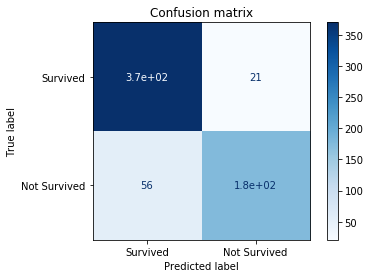

In [114]:
from sklearn.metrics import plot_confusion_matrix


disp = plot_confusion_matrix(lgc, X_train, y_train,
                             display_labels=['Survived','Not Survived'],
                             cmap=plt.cm.Blues,
                             )
disp.ax_.set_title('Confusion matrix')

print('Train results: confusion matrix')
print(disp.confusion_matrix)

TEST results: confusion matrix
[[143  15]
 [ 43  67]]


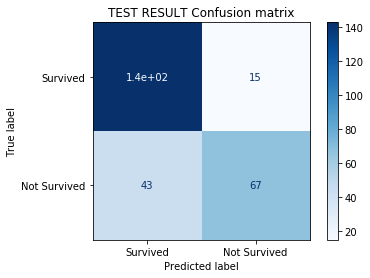

In [113]:
disp = plot_confusion_matrix(lgc, X_test, y_test,
                             display_labels=['Survived','Not Survived'],
                             cmap=plt.cm.Blues,
                             )
disp.ax_.set_title('TEST RESULT Confusion matrix')

print('TEST results: confusion matrix')
print(disp.confusion_matrix)